# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [6]:
# Write your code here

import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
  
train = pd.read_csv("stsa-train.txt", sep='delimiter', header=None)              
train = pd.DataFrame(train) 
train.columns = ["Text"] 
train['Reviews'] = train['Text'].str.split(' ').str[0]
#dataset  
train['Text'] = train['Text'].str.split(n=1).str[1]
train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,Text,Reviews
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ,...",1
6916,take care is nicely performed by a quintet of ...,0
6917,"the script covers huge , heavy topics in a bla...",0
6918,a seriously bad film with seriously warped log...,0


In [7]:
test = pd.read_csv("stsa-test.txt", sep='delimiter', header=None)        
test = pd.DataFrame(test) 
test.columns = ["Text"] 
test['Reviews'] = test['Text'].str.split(' ').str[0]
#dataset  
test['Text'] = test['Text'].str.split(n=1).str[1]
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Text,Reviews
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1
...,...,...
1816,"an often-deadly boring , strange reading of a ...",0
1817,the problem with concept films is that if the ...,0
1818,"safe conduct , however ambitious and well-inte...",0
1819,"a film made with as little wit , interest , an...",0


In [8]:
#Cleaning of data
nltk.download('stopwords') 
  
train_data = [] 
test_data = []
  
for i in range(0, 6920): 
    text = re.sub('[^a-zA-Z]', '', dataset['Text'][i]) 
    text = text.lower() 
    text = text.split() 
    ps = PorterStemmer() 
    text = ''.join(text) 
    train_data.append(text)

for i in range(0, 1821): 
    text = re.sub('[^a-zA-Z]', '', dataset_test['Text'][i]) 
    text = text.lower() 
    text = text.split() 
    ps = PorterStemmer() 
    text = ''.join(text) 
    test_data.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# creating bag of words model train data
c = CountVectorizer(max_features = 1500) 
  
X = c.fit_transform(train_data).toarray() 
y = dataset.iloc[:, 1].values

print(y)

['1' '0' '0' ... '0' '0' '1']


In [54]:
# splitting the data set into training set and validation set 
from sklearn.model_selection import train_test_split 
  
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
#MultinominalNB
# fitting naive bayes to the training set 
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
model = classifier.fit(X_train, y_train)
# predicting test set results 
y_pred = classifier.predict(X_val) 
print(y_pred)


['1' '1' '1' ... '1' '1' '1']


In [35]:
import sklearn.metrics as metrics 
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.5346820809248555


In [65]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [36]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [37]:
#SVM Model
from sklearn import svm
clf = svm.SVC()
model_svm = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(y_pred)

['1' '1' '1' ... '1' '1' '1']


In [66]:
#Accuracy from SVM Model
s= model_svm.score(X_val, y_val)
print("Accuracy:", s )
print(classification_report(y_val, y_pred))

Accuracy: 0.5346820809248555
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [40]:
#KNN Model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred = classifier.predict(X_val)
print(y_pred)


['1' '1' '1' ... '1' '1' '1']


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))


[[  1 645]
 [  0 738]]


In [45]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [49]:
#Decision tree
import pandas as pd
# To import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# To import train_test_split function
from sklearn.model_selection import train_test_split 
#To import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
#Decision Tree classifer object
clf = DecisionTreeClassifier()
#To fit Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#To Predict the response for test dataset
y_pred = clf.predict(X_val)
print(y_pred)


['1' '1' '1' ... '1' '1' '1']


In [67]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.5346820809248555
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [57]:
#Random Forest
# To import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets 
clf.fit(X_train,y_train)
y_pred=clf.predict(X_val)
y_pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [68]:
#Import scikit-learn metrics module
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.5346820809248555
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       646
           1       0.53      1.00      0.70       738

    accuracy                           0.53      1384
   macro avg       0.77      0.50      0.35      1384
weighted avg       0.75      0.53      0.37      1384



In [61]:
#XGBoost
import xgboost as xgb
import numpy as np
xg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg.fit(X_train,y_train)

[17:46:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [73]:
pred = xg.predict(X_val)
pred


array([0.5125731, 0.5125731, 0.5125731, ..., 0.5125731, 0.5125731,
       0.5125731], dtype=float32)

In [64]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("RMSE: %f" % (rmse))

RMSE: 0.499302


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [8]:
import pandas as pd
a_Review=pd.read_csv("Amazon_Unlocked_Mobile.csv")
a_Review

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
384347,Samsung SCH-i545 Galaxy S4 16GB Android Smartp...,NaN,139.95,4,Very easy to activate and I can take it to oth...,4.0
384348,Samsung SCH-i545 Galaxy S4 16GB Android Smartp...,NaN,139.95,5,When I click used I was expecting a used phone...,1.0
384349,Samsung SCH-i545 Galaxy S4 16GB Android Smartp...,NaN,139.95,4,I needed to replace my phone when I broke it. ...,0.0
384350,Samsung SCH-i545 Galaxy S4 16GB Android Smartp...,NaN,139.95,1,I am very upset. I bought this phone for my da...,1.0


In [9]:
data = a_Review.drop(columns=['Brand Name', 'Price','Review Votes','Product Name'])
data

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...
...,...,...
384347,4,Very easy to activate and I can take it to oth...
384348,5,When I click used I was expecting a used phone...
384349,4,I needed to replace my phone when I broke it. ...
384350,1,I am very upset. I bought this phone for my da...


In [11]:
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'




In [12]:
#changing reviews with score less than 3 to be positive
actualScore = data['Rating']
positiveNegative = actualScore.map(partition) 
data['Rating'] = positiveNegative

In [13]:
data

,Rating,Reviews
0,positive,I feel so LUCKY to have found this used (phone...
1,positive,"nice phone, nice up grade from my pantach revu..."
2,positive,Very pleased
3,positive,It works good but it goes slow sometimes but i...
4,positive,Great phone to replace my lost phone. The only...
...,...,...
384347,positive,Very easy to activate and I can take it to oth...
384348,positive,When I click used I was expecting a used phone...
384349,positive,I needed to replace my phone when I broke it. ...
384350,negative,I am very upset. I bought this phone for my da...


In [14]:
data["Rating"].value_counts()

positive    294926
negative     89426
Name: Rating, dtype: int64

In [21]:
from nltk.stem.porter import *
import re

nltk.download('stopwords') 

clean_Reviews=[]
  
for i in range(0, 384352): 
    text = re.sub('[^a-zA-Z]', '', str(data['Reviews'][i]))
    text = text.lower() 
    text = text.split() 
    ps = PorterStemmer() 
    text = ''.join(text) 
    clean_Reviews.append(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
clean_Reviews

['ifeelsoluckytohavefoundthisusedphonetousnotusedhardatallphoneonlinefromsomeonewhoupgradedandsoldthisonemysonlikedhisoldonethatfinallyfellapartafteryearsanddidntwantanupgradethankyousellerwereallyappreciateityourhonestyresaidusedphoneirecommendthissellerveryhighlywouldbutfromthemagain',
 'nicephoneniceupgradefrommypantachrevueverycleansetupandeasysetupneverhadanandroidphonebuttheyarefantastictosaytheleastperfectsizeforsurfingandsocialmediagreatphonesamsung',
 'verypleased',
 'itworksgoodbutitgoesslowsometimesbutitsaverygoodphoneiloveit',
 'greatphonetoreplacemylostphonetheonlythingisthevolumeupbuttondoesnotworkbuticanstillgointosettingstoadjustotherthanthatitdoesthejobuntiliameligibletoupgrademyphoneagainthaanks',
 'ialreadyhadaphonewithproblemsiknowitstateditwasusedbutdangitdidnotstatethatitdidnotchargeiwishiwouldhavereadthesecommentstheniwouldhavenotpurchasedthisitemanditscrackedonthesidedamagedgoodsiswhatitisiftryingtochargeitanotherwaydoesnotworkiamrequestingformymoneybackandiwill

In [23]:
data['clean_data']=clean_Reviews
data

,Rating,Reviews,clean_data
0,positive,I feel so LUCKY to have found this used (phone...,ifeelsoluckytohavefoundthisusedphonetousnotuse...
1,positive,"nice phone, nice up grade from my pantach revu...",nicephoneniceupgradefrommypantachrevueveryclea...
2,positive,Very pleased,verypleased
3,positive,It works good but it goes slow sometimes but i...,itworksgoodbutitgoesslowsometimesbutitsaverygo...
4,positive,Great phone to replace my lost phone. The only...,greatphonetoreplacemylostphonetheonlythingisth...
...,...,...,...
384347,positive,Very easy to activate and I can take it to oth...,veryeasytoactivateandicantakeittoothercarriers...
384348,positive,When I click used I was expecting a used phone...,wheniclickusediwasexpectingausedphonebutclearl...
384349,positive,I needed to replace my phone when I broke it. ...,ineededtoreplacemyphonewhenibrokeitthiswasfine...
384350,negative,I am very upset. I bought this phone for my da...,iamveryupsetiboughtthisphoneformydaughterforch...


**K-Means Clustering**

In [24]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data['clean_data'].values)
bow.shape

(384352, 141599)

In [25]:
bow

<384352x141599 sparse matrix of type '<class 'numpy.int64'>'
	with 383461 stored elements in Compressed Sparse Row format>

In [26]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names()

In [27]:
#first 10 columns generated by BOW
terms[1:10]

['aaa',
 'aaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaawwwwwwweeeeeeeeeesssssssssoooooommmmmmmmmmeeeeeee',
 'aaaaafastshipping',
 'aaagood',
 'aandworksverywell']

In [28]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++', n_jobs = -1,random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [29]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [30]:
cluster_center

array([[1.09048578e-05, 6.81553615e-05, 1.90835012e-05, ...,
        2.72621446e-06, 2.72621446e-06, 2.72621446e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [31]:
df = data
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df

,Rating,Reviews,clean_data,Bow Clus Label
0,positive,I feel so LUCKY to have found this used (phone...,ifeelsoluckytohavefoundthisusedphonetousnotuse...,0
1,positive,"nice phone, nice up grade from my pantach revu...",nicephoneniceupgradefrommypantachrevueveryclea...,0
2,positive,Very pleased,verypleased,0
3,positive,It works good but it goes slow sometimes but i...,itworksgoodbutitgoesslowsometimesbutitsaverygo...,0
4,positive,Great phone to replace my lost phone. The only...,greatphonetoreplacemylostphonetheonlythingisth...,0
...,...,...,...,...
384347,positive,Very easy to activate and I can take it to oth...,veryeasytoactivateandicantakeittoothercarriers...,0
384348,positive,When I click used I was expecting a used phone...,wheniclickusediwasexpectingausedphonebutclearl...,0
384349,positive,I needed to replace my phone when I broke it. ...,ineededtoreplacemyphonewhenibrokeitthiswasfine...,0
384350,negative,I am very upset. I bought this phone for my da...,iamveryupsetiboughtthisphoneformydaughterforch...,0


In [32]:
df.groupby(['Bow Clus Label'])['clean_data'].count()

Bow Clus Label
0    366809
1      2158
2         6
3       997
4      5095
5      5608
6         6
7      1909
8      1754
9        10
Name: clean_data, dtype: int64

In [33]:
# to find the top 10 features of cluster centriod

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()


Top terms per cluster:
Cluster 0: excellent
 verygood
 great
 loveit
 ok
 iloveit
 excellentproduct
 goodphone
 greatproduct
 worksgreat
Cluster 1: excelent
 zunedidnotrecognizemydeviceusingsimilarcablessohavetopurchasesamsungcableshouldnttheyshipwithcablelikeeveryotherphonerhetoricalupdategotcableupdatedtopleasedwiththefunctionality
 igotadefectiveproductmorethanweeksnowandstilldonthavemyreimbursementnoranewunitthisistakingsolong
 igotaghzinsteadofaghzannounced
 igotafakephoneandtoldthesellertoswitchsuppliersiwillgivethemthebenefitofthedoubtthattheyunknowinglyweresellingfakenokiaxsiboughtarealonefromanotherwebsiteinthemeantimethesellerwasverycourteousandensuredigotafullrefundontheshippingandthereturnshippingthespeakerwasdamagedcreatingacracklingonespeakerdidntworkatallstereospeakerswereadvertisedthepackageincludedatackyshinyoriginalstickertheovicdwasmissingthepackagingboxlookedlikeitwasprintedonaninkjetprinterwithinksmearsthebookletwasmadeoflowqualitypaperandmissingthesleekacrylicpape

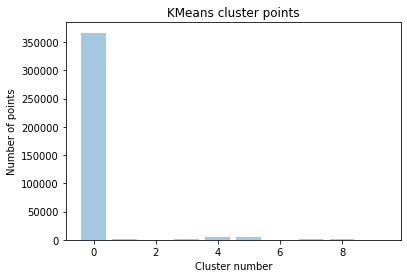

In [34]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['clean_data'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [35]:
# Reading a review which belong to each group.
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(df.iloc[df.groupby(['Bow Clus Label']).groups[i][0]]['clean_data'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
ifeelsoluckytohavefoundthisusedphonetousnotusedhardatallphoneonlinefromsomeonewhoupgradedandsoldthisonemysonlikedhisoldonethatfinallyfellapartafteryearsanddidntwantanupgradethankyousellerwereallyappreciateityourhonestyresaidusedphoneirecommendthissellerveryhighlywouldbutfromthemagain


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
excelent


______________________________________________________________________
A review of assigned to cluster  2
----------------------------------------------------------------------
phoneisgreatsellerwasgreatwhenihadquestionsalso


______________________________________________________________________
A review of assigned to cluster  3
----------------------------------------------------------------------
nice


________

In [36]:
#consider sample of 3 random reviews for cluster 0
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][3]]['clean_data'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][15]]['clean_data'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[0][25]]['clean_data'])

itworksgoodbutitgoesslowsometimesbutitsaverygoodphoneiloveit
______________________________________________________________________
hadthisphonebeforeandloveditbutwasnotworkingsoigotthisphoneonethingisthesdcardslotdoesnotopenupwhenitrytoaccessitinfilemanagmentevendoesnotshowuponthecomputerthecardisfinewasabletoopenonanotherphonetryingtotroubleshootitfornow
______________________________________________________________________
thephonewasgreatandingoodconditionmydaughterissohappythebeaandriodusernow


In [37]:
#consider sample of 3 random reviews for cluster 4

print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][3]]['clean_data'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][15]]['clean_data'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[3][25]]['clean_data'])

nice
______________________________________________________________________
nice
______________________________________________________________________
nice


In [38]:
#consider sample of 3 random reviews for cluster 6

print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][3]]['clean_data'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][15]]['clean_data'])
print("_" * 70)
print(df.iloc[df.groupby(['Bow Clus Label']).groups[5][25]]['clean_data'])

good
______________________________________________________________________
good
______________________________________________________________________
good


**Analysis of K means for BOW**

Of all the clusters, 0, 6 and 9 accounts to more % of reviews,we can find differences between these 3 clusters is key. Also, the all the clusters  have only 1 review

If we observe the top terms per cluster, The all the clusters  which consists of excellentperfect,love,great, which are top centroid features and can say this cluster consists of all positive reviews, let us obersve few reviews of each cluster and try to understand the differences

By reading random reviews of cluster 0, we can easily say that these reviews are extremly negative of the product usage and customers are not happy with the product
By reading random reviews of cluster 4,we can easily that reviews are positive and same with cluster 6 .

In [39]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(data['clean_data'].values)
tfidf.shape

(384352, 141599)

In [40]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [41]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [42]:
cluster_center_tf

array([[1.09048578e-05, 6.81553615e-05, 1.90835012e-05, ...,
        2.72621446e-06, 2.72621446e-06, 2.72621446e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [43]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names()

In [44]:
terms1[1:10]

['aaa',
 'aaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaawwwwwwweeeeeeeeeesssssssssoooooommmmmmmmmmeeeeeee',
 'aaaaafastshipping',
 'aaagood',
 'aandworksverywell']

In [45]:
# Giving Labels/assigning a cluster to each point/text 
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

,Rating,Reviews,clean_data,Bow Clus Label,Tfidf Clus Label
0,positive,I feel so LUCKY to have found this used (phone...,ifeelsoluckytohavefoundthisusedphonetousnotuse...,0,0
1,positive,"nice phone, nice up grade from my pantach revu...",nicephoneniceupgradefrommypantachrevueveryclea...,0,0
2,positive,Very pleased,verypleased,0,0
3,positive,It works good but it goes slow sometimes but i...,itworksgoodbutitgoesslowsometimesbutitsaverygo...,0,0
4,positive,Great phone to replace my lost phone. The only...,greatphonetoreplacemylostphonetheonlythingisth...,0,0


In [46]:
df1.groupby(['Tfidf Clus Label'])['clean_data'].count()

Tfidf Clus Label
0    366809
1      2158
2         6
3       997
4      5095
5      5608
6         6
7      1909
8      1754
9        10
Name: clean_data, dtype: int64

In [47]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: excellent
 verygood
 great
 loveit
 ok
 iloveit
 excellentproduct
 goodphone
 greatproduct
 worksgreat
Cluster 1: excelent
 zunedidnotrecognizemydeviceusingsimilarcablessohavetopurchasesamsungcableshouldnttheyshipwithcablelikeeveryotherphonerhetoricalupdategotcableupdatedtopleasedwiththefunctionality
 igotadefectiveproductmorethanweeksnowandstilldonthavemyreimbursementnoranewunitthisistakingsolong
 igotaghzinsteadofaghzannounced
 igotafakephoneandtoldthesellertoswitchsuppliersiwillgivethemthebenefitofthedoubtthattheyunknowinglyweresellingfakenokiaxsiboughtarealonefromanotherwebsiteinthemeantimethesellerwasverycourteousandensuredigotafullrefundontheshippingandthereturnshippingthespeakerwasdamagedcreatingacracklingonespeakerdidntworkatallstereospeakerswereadvertisedthepackageincludedatackyshinyoriginalstickertheovicdwasmissingthepackagingboxlookedlikeitwasprintedonaninkjetprinterwithinksmearsthebookletwasmadeoflowqualitypaperandmissingthesleekacrylicpape

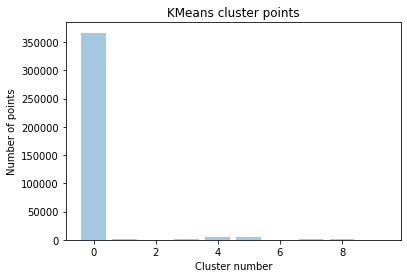

In [48]:
# visually how points or reviews are distributed across 10 clusters 

plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['clean_data'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [49]:
# Reading a review which belong to each group.
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][4]]['clean_data'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['clean_data'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][4]]['clean_data'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
greatphonetoreplacemylostphonetheonlythingisthevolumeupbuttondoesnotworkbuticanstillgointosettingstoadjustotherthanthatitdoesthejobuntiliameligibletoupgrademyphoneagainthaanks


ialreadyhadaphonewithproblemsiknowitstateditwasusedbutdangitdidnotstatethatitdidnotchargeiwishiwouldhavereadthesecommentstheniwouldhavenotpurchasedthisitemanditscrackedonthesidedamagedgoodsiswhatitisiftryingtochargeitanotherwaydoesnotworkiamrequestingformymoneybackandiwillgetmymoneybacksignedanunhappycustomer


greatphonetoreplacemylostphonetheonlythingisthevolumeupbuttondoesnotworkbuticanstillgointosettingstoadjustotherthanthatitdoesthejobuntiliameligibletoupgrademyphoneagainthaanks


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
excelent


excelent


excelent


_______________

**Analysis of K means for TF_IDF:**

All the cluster 4 accounts to more % of reviews.

If we observe the top terms per cluster, The clusters based on the reviews wise are  good and bad. for example, if we oberve cluster 9, the reviews talk more about favcolor, newiphone, and other reviews which are like defective camera,app is not launching,and other like excellent,great phone.
In these, its better to understand the cluster center top features rather than individual reviews.

In [50]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in data['clean_data'].values:
    list_of_sent.append(sent.split())

In [51]:
print(data['clean_data'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

ifeelsoluckytohavefoundthisusedphonetousnotusedhardatallphoneonlinefromsomeonewhoupgradedandsoldthisonemysonlikedhisoldonethatfinallyfellapartafteryearsanddidntwantanupgradethankyousellerwereallyappreciateityourhonestyresaidusedphoneirecommendthissellerveryhighlywouldbutfromthemagain
*****************************************************************
['ifeelsoluckytohavefoundthisusedphonetousnotusedhardatallphoneonlinefromsomeonewhoupgradedandsoldthisonemysonlikedhisoldonethatfinallyfellapartafteryearsanddidntwantanupgradethankyousellerwereallyappreciateityourhonestyresaidusedphoneirecommendthissellerveryhighlywouldbutfromthemagain']


In [52]:
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [53]:
i=0
list_of_sent_train=[]
for sent in data['clean_data'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [54]:
import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)

In [55]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(384352, 100)

In [56]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l


In [59]:
def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [60]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

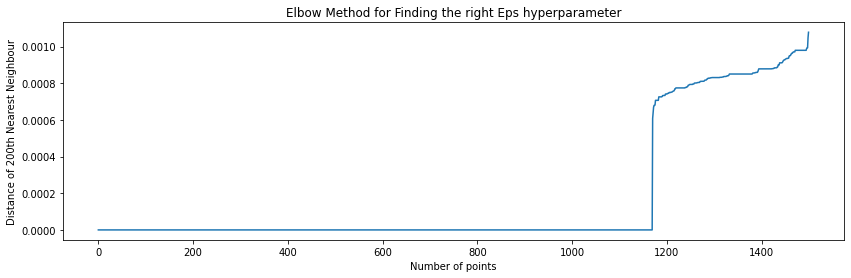

In [61]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

In [ ]:
dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

In [ ]:
dfdb.groupby(['AVG-W2V Clus Label'])['Id'].count()

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

In [ ]:
# How many points belong to each cluster ->
aggdfa.groupby(['AVG-W2V Clus Label'])['Text'].count()

In [ ]:
# Reading a review which belong to each group.
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Text'])
    print('\n')
    print("_" * 70)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

#You can write you answer here. (No code needed)


From the above code, we can say that Hierarchical clustering can’t handle big data well but K Means clustering can. Due to the time complexity of K Means is linear where as  while that of hierarchical clustering is quadratic,where as DBSCAN is very poorly performining on the large number columns as it is grouping all reviews in one cluster.FOR TFIDF K means is best for identification when compared with the K MEANS for BOW, all the clusters are clearly refelcting they were grouped based on the categories/products. K means performance was very good on the cluster centers top terms but however when we compare reviews.